In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("messi_goals.csv")

In [3]:
#Get the first 5 rows of the dataframe
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


<Axes: >

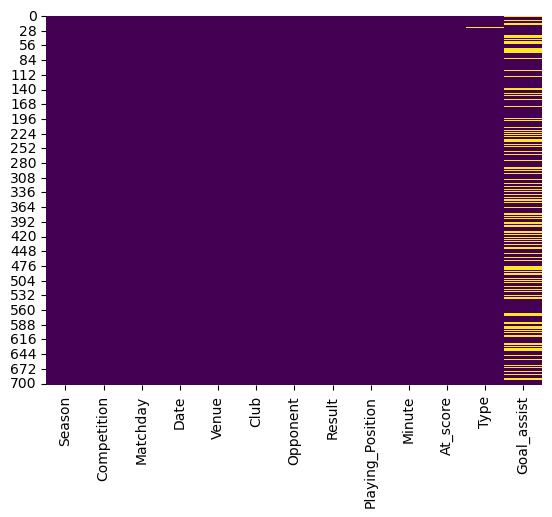

In [4]:
#Get an idea of null values
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)

Fortunately the numerical values are all there. 

In [5]:
#Some values are formatted incorrectly
df['Season'].replace(["11-Dec","Dec-13"],["11/12","12/13"], inplace = True)
df['Competition'].replace(['Troph�e des Champions','Champions League'],['Trophée des Champions','UEFA Champions League'], inplace = True)

In [6]:
#Get the shape of the dataframe
df.shape

(704, 13)

In [7]:
#Some info about the dataframe
df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,704,704,704,704,704,704,704,704,704,704,704,703,490
unique,19,8,48,455,2,2,98,55,9,97,46,12,71
top,11/12,LaLiga,Group Stage,03/07/12,H,FC Barcelona,Sevilla FC,4:00,CF,55,1:00,Left-footed shot,Luis Suarez
freq,73,474,80,5,420,672,38,47,276,14,98,436,48


In [8]:
#Some more info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    object
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: object(13)
memory usage: 71.6+ KB


In [9]:
#Columns present in the dataframe
df.columns

Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [10]:
#Goals over seasons and years
goals_df = df['Season'].value_counts(sort = False).reset_index()
goals_df.columns = ['Season','Goals'] 
goals_df

,Season,Goals
0,04/05,1
1,05/06,8
2,06/07,17
3,07/08,16
4,08/09,38
5,09/10,47
6,10/11,53
7,11/12,73
8,12/13,60
9,13/14,41


<Axes: title={'center': 'Goals Per Season'}, xlabel='Season', ylabel='Goals'>

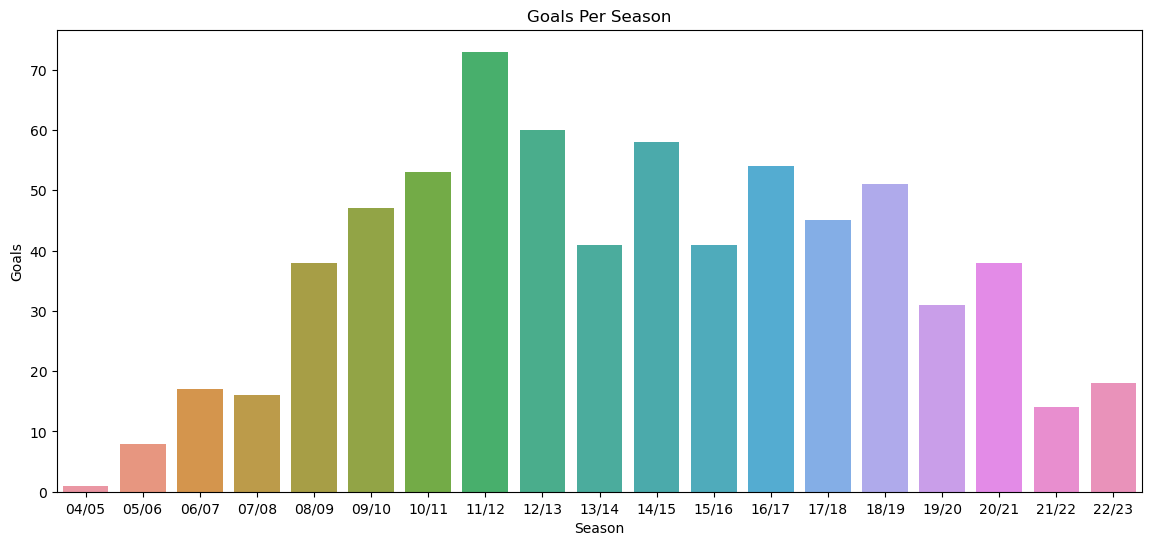

In [11]:
plt.figure(figsize=(14,6))
plt.title('Goals Per Season')
sns.barplot(x = goals_df['Season'], y = goals_df['Goals'])

In [12]:
#Goals per season per competition
comp_df = df.groupby(['Season','Competition']).agg(Goals = ('Season','count')).reset_index()
comp_df

,Season,Competition,Goals
0,04/05,LaLiga,1
1,05/06,Copa del Rey,1
2,05/06,LaLiga,6
3,05/06,UEFA Champions League,1
4,06/07,Copa del Rey,2
...,...,...,...
62,21/22,Trophée des Champions,1
63,21/22,UEFA Champions League,5
64,22/23,Ligue 1,13
65,22/23,Trophée des Champions,1


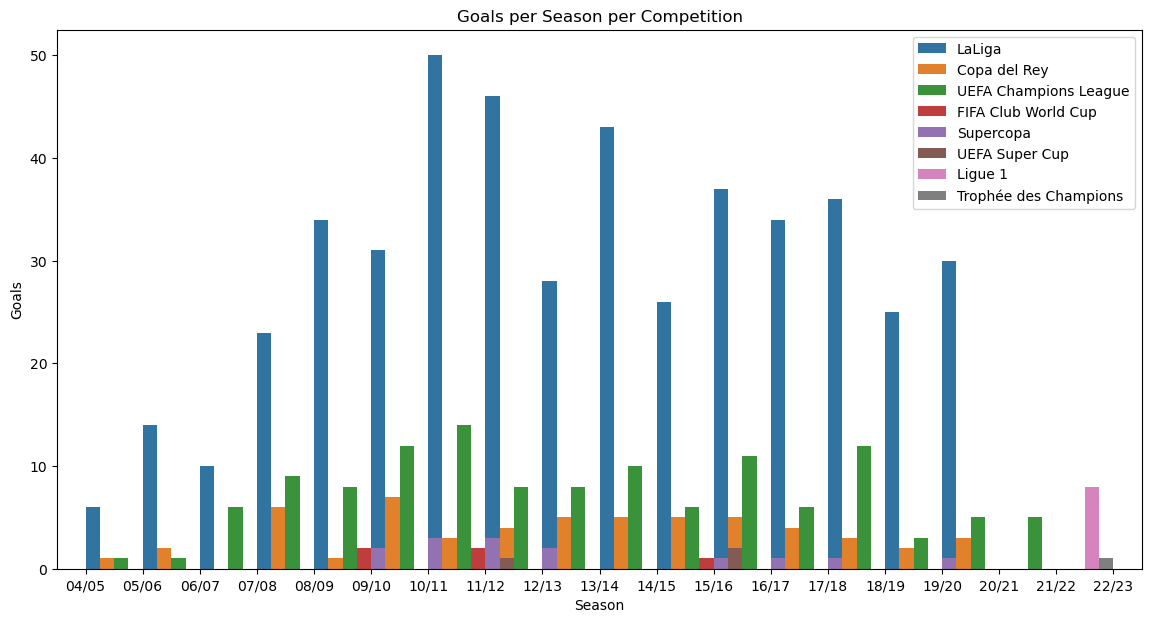

In [13]:
#Bar chart of goals in each competition
plt.figure(figsize = (14,7))
plt.title('Goals per Season per Competition')
sns.barplot(x = comp_df['Season'], y = comp_df['Goals'], hue = comp_df['Competition'], width = 2)
plt.legend(loc='upper right')

<Axes: title={'center': 'Goals Per Season Per Competition'}, xlabel='Season'>

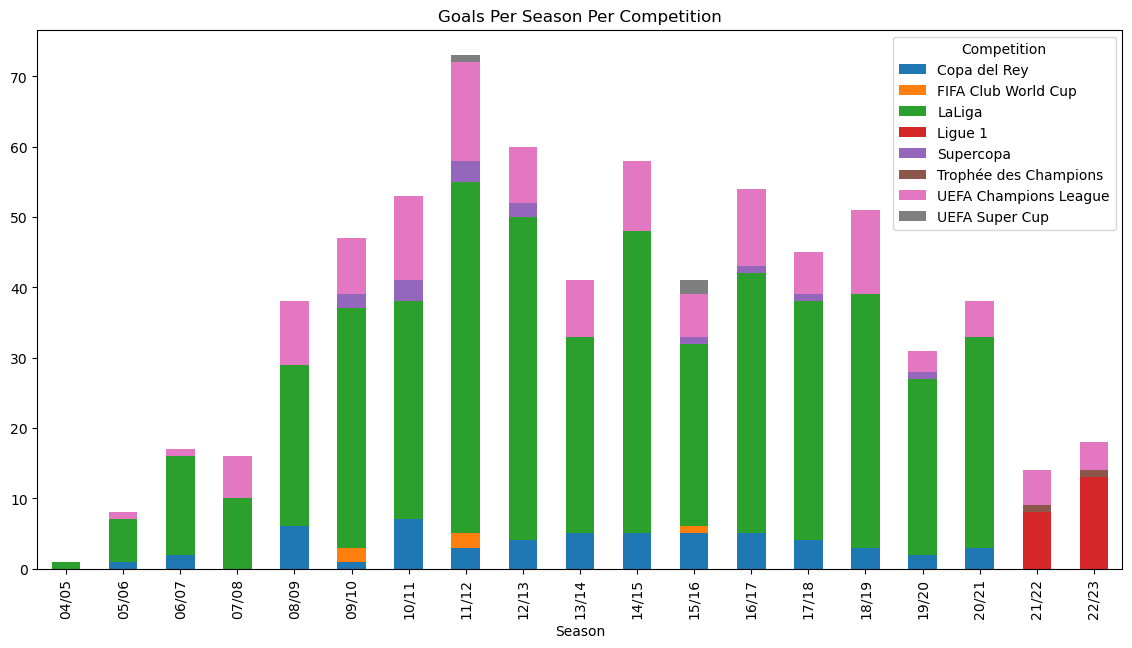

In [14]:
#Getting a stacked bar chart
pivot_df = comp_df.pivot_table(index='Season', columns='Competition', values='Goals')
pivot_df.plot(kind='bar', stacked=True, figsize = (14, 7), title = 'Goals Per Season Per Competition')

In [15]:
#Function to work out percentages
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} Goals)".format(pct, absolute)

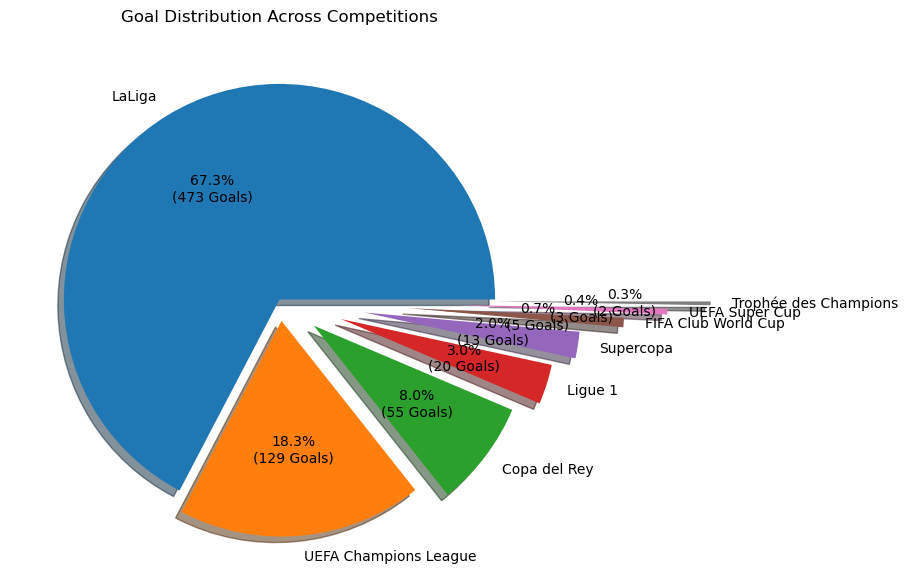

In [16]:
#Pie chart for goals in each competition
plt.figure(figsize = (14, 7))
competition = df['Competition'].value_counts().reset_index()
competition.columns = ['Competition','Goals']
plt.pie(competition['Goals'], explode = (0,0.1,0.2,0.3,0.4,0.6,0.8,1),labels = competition['Competition'], autopct = lambda pct: func(pct, competition['Goals']),shadow = True)
plt.title('Goal Distribution Across Competitions')
plt.show()

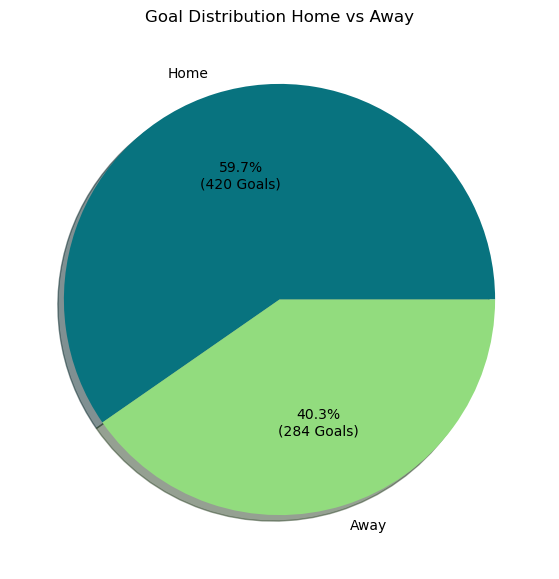

In [17]:
#Pie Chart for Home/Away
plt.figure(figsize = (14, 7))
place = df['Venue'].value_counts()
plt.pie(place, shadow = True, colors = ['#08737f', '#92dc7e'], labels = ['Home','Away'], autopct = lambda pct: func(pct, place.values))
plt.title('Goal Distribution Home vs Away')
plt.show()

<Axes: xlabel='Playing_Position', ylabel='count'>

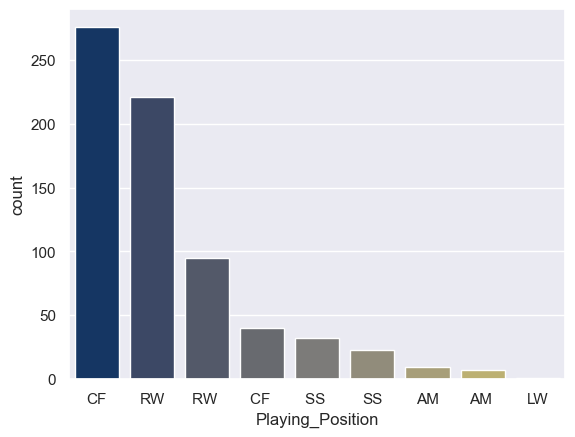

In [18]:
#Goals amongst different positions
sns.set(style="darkgrid")
sns.countplot(x = 'Playing_Position', data = df, palette = 'cividis', order = df['Playing_Position'].value_counts().index)

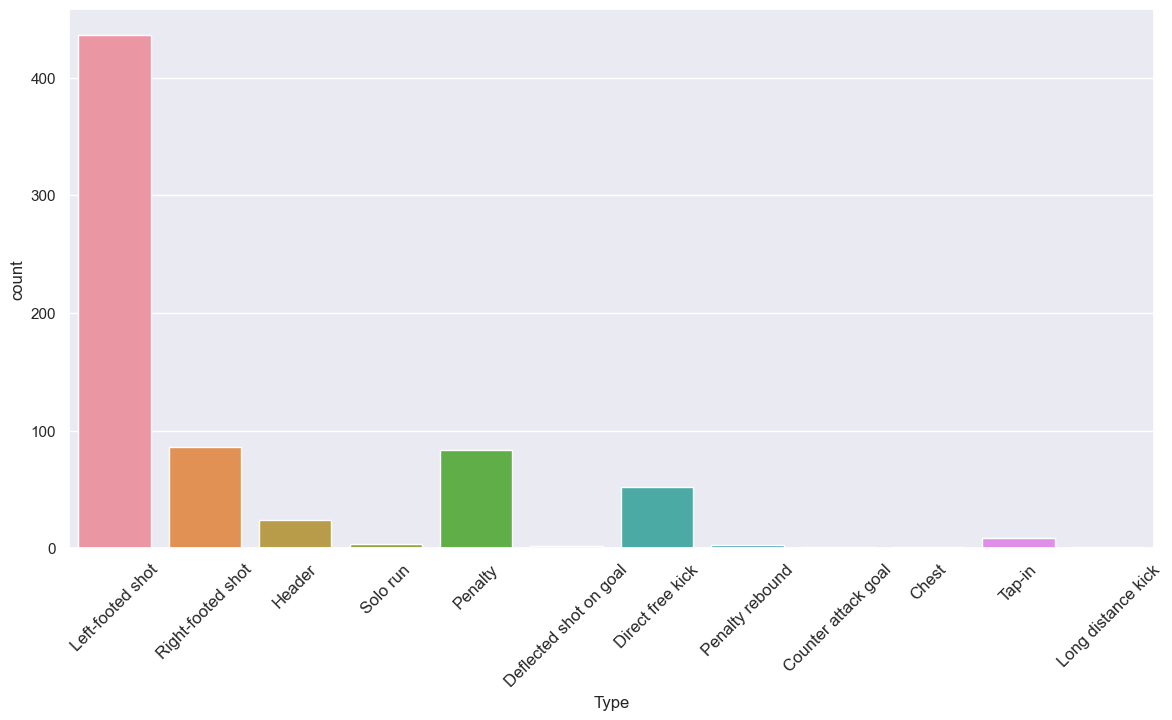

In [19]:
#Types of goals scored
plt.figure(figsize  = (14, 7))
sns.countplot(x = 'Type',data = df, width = 0.8)
plt.xticks(rotation = 45, size = 12)
plt.show()